In [1]:
import pandas as pd
import numpy as np

In [29]:
from sklearn.cross_validation import train_test_split
from sklearn import linear_model

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
kc = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week1/kc_house_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [9]:
kc_test = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week1/kc_house_test_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_train = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week1/kc_house_train_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [117]:
#x_train, x_test= train_test_split(kc, test_size=0.2, random_state = 0)

In [119]:
#x_train, x_test = kc.iloc[:round(len(kc)*0.8)] , kc.iloc[round(len(kc)*0.8):]

In [161]:
x_train, x_test = kc_train, kc_test

In [135]:
input_feature = np.array(x_train['sqft_living']).reshape(-1,1)
output = np.array(x_train['price'])
type(input_feature)
input_feature

array([[ 1180.],
       [ 2570.],
       [  770.],
       ..., 
       [ 1530.],
       [ 1600.],
       [ 1020.]])

In [136]:
model = linear_model.base.LinearRegression(fit_intercept=True)
regr = model.fit(input_feature, output)

Slope: [ 281.95883963] 
Intercept: -47116.0790729
Residual sum of squares: 69139343889.63
Variance score: 0.49


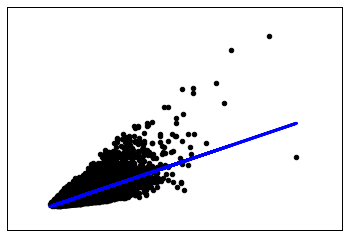

In [137]:
# The coefficients
print('Slope:', regr.coef_, '\nIntercept:', regr.intercept_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(input_feature) - output) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(input_feature, output))

# Plot outputs
plt.scatter(input_feature, output,  color='black')
plt.plot(input_feature, regr.predict(input_feature), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [66]:
def simple_linear_regression(input_feature_name, output_name):
    input_feature = np.array(x_train[input_feature_name]).reshape(-1,1)
    output = np.array(x_train[output_name])
    model = linear_model.base.LinearRegression(fit_intercept=True)
    regr = model.fit(input_feature, output)
    RSS = []
    for i in range(0, len(output)-1):
        RSS = (output[i] - (regr.intercept_ + regr.coef_ * input_feature[i]))**2
        RSS += RSS
    return(regr.intercept_, float(regr.coef_), float(RSS))

In [67]:
simple_linear_regression('sqft_living', 'price')

(-44717.625807837816, 280.76237946562804, 2406007340610.009)

In [49]:
squarefeet_intercept = simple_linear_regression('sqft_living', 'price')[0]
squarefeet_intercept

-44717.625807837816

In [50]:
squarfeet_slope = simple_linear_regression('sqft_living', 'price')[1]
squarfeet_slope

280.76237946562804

In [53]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = intercept + slope * input_feature
    return(predicted_output)

In [54]:
get_regression_predictions(2650,squarefeet_intercept,squarfeet_slope)

699302.67977607646

In [68]:
def get_residual_sum_of_squares(input_feature_name, output_name):
    input_feature = np.array(x_train[input_feature_name]).reshape(-1,1)
    output = np.array(x_train[output_name])
    RSS = (output - (simple_linear_regression(input_feature_name, output_name)[0] + simple_linear_regression(input_feature_name, output_name)[1] * input_feature))**2
    return(RSS)

# Method from course notebook

In [165]:
def simple_linear_regression(dataset, input_feature_name, output_name):
    input_feature = dataset[input_feature_name]
    output = dataset[output_name]
    slope = (sum(input_feature*output)-sum(input_feature)*sum(output)/len(input_feature)) / (sum(input_feature**2)-sum(input_feature)*sum(input_feature)/len(input_feature))
    intercept = (sum(output) - slope*sum(input_feature))/len(input_feature)
    predicted_output = intercept + slope * input_feature
    residuals = predicted_output - output
    RSS = sum(residuals**2)
    plt.scatter(input_feature, output,  color='black')
    plt.plot(input_feature, predicted_output, color='blue',
             linewidth=3)

    plt.xticks(())
    plt.yticks(())

    plt.show()
    return(intercept, slope, RSS)

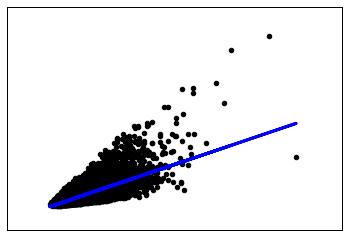

(-47116.079072894121, 281.9588396303426, 1201918354177285.8)

In [166]:
simple_linear_regression(x_train, 'sqft_living', 'price')

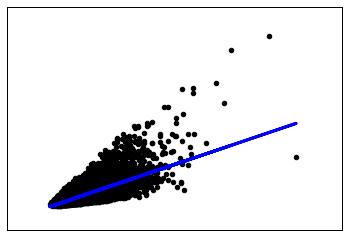

In [167]:
sqft_intercept, sqft_slope = simple_linear_regression(x_train, 'sqft_living','price')[0:2]

In [169]:
def get_regression_predictions(input_feature, intercept, slope):
    predicted_output = intercept + slope * input_feature
    return(predicted_output)

In [170]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print( "The estimated price for a house with %d squarefeet is $%.2f" % (my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is $700074.85


In [171]:
def get_residual_sum_of_squares(dataset, input_feature_name, output_name, intercept, slope):
    input_feature = dataset[input_feature_name]
    output = dataset[output_name]
    predicted_output = get_regression_predictions(input_feature, intercept, slope)
    residuals = predicted_output - output
    RSS = sum(residuals**2)
    return(RSS)

In [172]:
get_residual_sum_of_squares(x_test, 'sqft_living','price', sqft_intercept, sqft_slope)

275402933617813.09

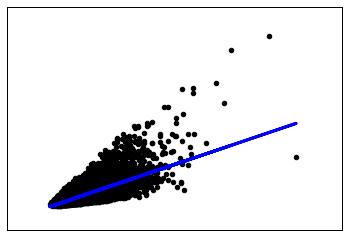

(-47116.079072894121, 281.9588396303426, 1201918354177285.8)

In [173]:
simple_linear_regression(x_train, 'sqft_living','price')

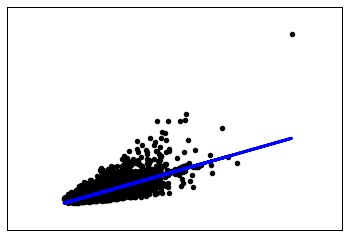

(-28639.897221540778, 274.93662162084144, 275168573899671.72)

In [174]:
simple_linear_regression(x_test, 'sqft_living','price')

In [175]:
def inverse_regression_predictions(output, intercept, slope):
    estimated_feature = (output - intercept) / slope
    return estimated_feature

In [182]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print ("The estimated squarefeet for a house worth $%.2f is %d" % (my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth $800000.00 is 3004


# 'bedrooms'

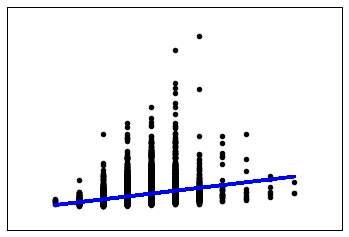

(109473.17762295963, 127588.95293398784, 2143244498162069.0)

In [177]:
simple_linear_regression(x_train, 'bedrooms','price')

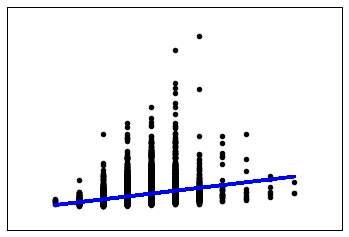

In [178]:
bed_intercept, bed_slope = simple_linear_regression(x_train, 'bedrooms','price')[0:2]

In [180]:
get_residual_sum_of_squares(x_test, 'bedrooms','price', bed_intercept, bed_slope)

493364585960301.38

In [181]:
get_residual_sum_of_squares(x_test, 'sqft_living','price', sqft_intercept, sqft_slope)

275402933617813.09